## Relatório de desempenho de vendas

Com uma base de dados contendo as vendas consolidadas de 2023 em todo o Brasil.

Este projeto é uma excelente oportunidade para praticar a manipulação e visualização de dados, além de aprender a gerar relatórios automatizados em um formato amplamente utilizado.

O projeto é altamente versátil e pode ser aplicado a outros tipos de dados contábeis e financeiros de empresas. Por exemplo, podemos adaptar o código para criar relatórios de fluxo de caixa, demonstrativos de resultados, ou mesmo relatórios detalhados de despesas e receitas. A capacidade de gerar relatórios automatizados ajuda a economizar tempo e trazer consistência nos documentos gerados.

In [1]:
# bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_vendas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/python-financas/main/Video_01/vendas.csv")
df_vendas["data_pedido"] = pd.to_datetime(df_vendas['data_pedido'], format="%Y-%m-%d")
df_vendas.head()

,data_pedido,modo_envio,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2023-06-22,Econômica,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2023-02-17,Econômica,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2023-04-28,Econômica,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2023-07-12,Entrega padrão,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2023-11-20,Entrega padrão,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [3]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   modo_envio           8940 non-null   object        
 2   segmento_cliente     8940 non-null   object        
 3   cidade               8940 non-null   object        
 4   estado               8940 non-null   object        
 5   regiao               8940 non-null   object        
 6   departamento         8940 non-null   object        
 7   tipo_produto         8940 non-null   object        
 8   preco_base           8940 non-null   float64       
 9   preco_unit_sem_desc  8940 non-null   float64       
 10  desconto             8940 non-null   float64       
 11  preco_unit_venda     8940 non-null   float64       
 12  quantidade           8940 non-null   int64         
 13  vendas               8940 non-nul

### Vendas por mês

In [4]:
vendas_por_mes = df_vendas[["data_pedido", "vendas"]]

vendas_por_mes.set_index("data_pedido", inplace=True)
vendas_por_mes = vendas_por_mes.resample("M").sum()
vendas_por_mes = vendas_por_mes.rename_axis("Mês").reset_index()
vendas_por_mes.tail()

C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_4352\3247755755.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_por_mes = vendas_por_mes.resample("M").sum()


,Mês,vendas
7,2023-08-31,646845.83
8,2023-09-30,562362.24
9,2023-10-31,607337.87
10,2023-11-30,619353.47
11,2023-12-31,585893.35


In [5]:
vendas_por_mes["Mês"] = pd.to_datetime(vendas_por_mes["Mês"], errors='coerce') # transformando em datetime
vendas_por_mes["Mês"] = vendas_por_mes["Mês"].dt.strftime("%b")
vendas_por_mes["vendas"] = (vendas_por_mes["vendas"] / 1e3).round(2)
vendas_por_mes

,Mês,vendas
0,Jan,551.28
1,Feb,545.09
2,Mar,580.62
3,Apr,645.45
4,May,634.16
5,Jun,582.66
6,Jul,519.95
7,Aug,646.85
8,Sep,562.36
9,Oct,607.34


In [6]:
def grafico_vendas_por_mes(df, filename):
    fig, ax = plt.subplots(figsize=(12,6), dpi=100)
    
    ax.plot(df["Mês"], df["vendas"], lw = 3, marker = "x", color="darkgreen")
    
    ax.set_title("Total de Vendas em 2023", fontsize = 18, loc='left')
    ax.set_xlabel("Mês")
    ax.set_ylabel("Vendas (em milhares de reais)")
    ax.set_frame_on(False)
    ax.grid(True, color='grey', ls='--', alpha=0.5)
    ax.tick_params(axis="both", which='both', length=0)
    
    plt.ylim(0, df["vendas"].max() + 100)
    plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()

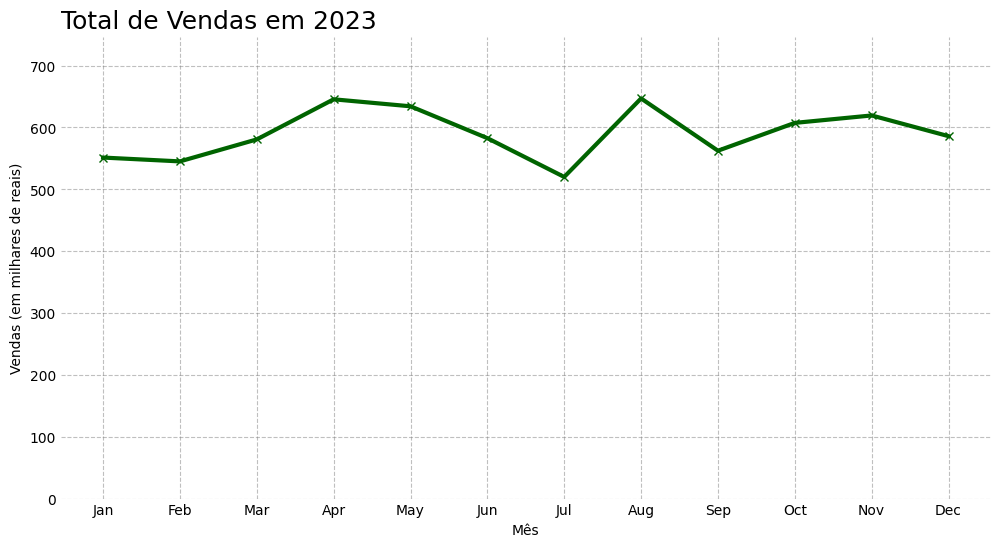

In [7]:
grafico_vendas_por_mes(vendas_por_mes, "vendas_por_mes.png")

### Lucro por departamento anual

In [8]:
lucro_dpt = df_vendas[["departamento","lucro"]]

lucro_dpt = lucro_dpt.groupby("departamento").sum()
lucro_dpt = lucro_dpt.reset_index()
lucro_dpt

,departamento,lucro
0,Automotivo,230663.33
1,Jardinagem e paisagismo,196801.66
2,Materiais de construção,26793.53


In [9]:
def grafico_lucro_por_departamento(df, filename):
    fig, ax = plt.subplots(figsize=(12,6),dpi=100)
    
    ax.barh(df["departamento"], df["lucro"], height=0.8, color="darkgreen")

    ax.set_title('Lucro por Departamento em 2023', fontsize = 18, loc='left')
    ax.set_frame_on(False)
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='both', length=0)

    for i, v in enumerate(df["lucro"]):
        ax.text(df["lucro"][i] + 1e3, i, f'R$ {df["lucro"][i]:,.2f}', fontsize = 12, ha = 'left', va='center')

    plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()
        

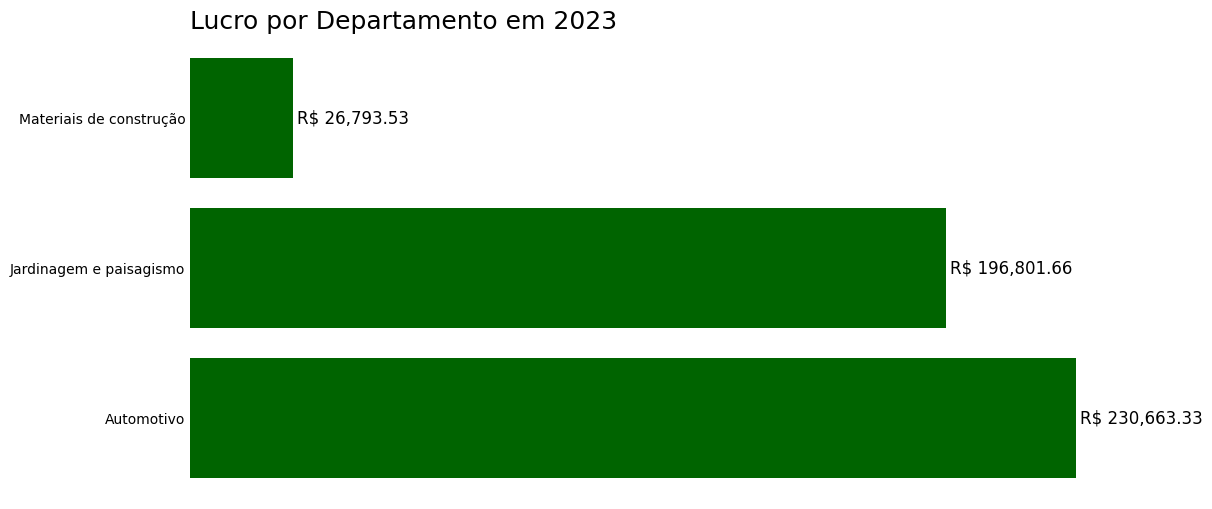

In [10]:
grafico_lucro_por_departamento(lucro_dpt, "lucro_departamento.png")

### Modos de envio mais utilizados do estado de Pernambuco

In [11]:
envios_pe = df_vendas.query('estado == "Pernambuco"')[["modo_envio"]]
envios_pe = envios_pe.value_counts().to_frame()
envios_pe = envios_pe.reset_index()
envios_pe


,modo_envio,count
0,Entrega padrão,228
1,Envio rápido,55
2,Econômica,52
3,24 horas,8


In [12]:
soma = envios_pe["count"].sum()


In [13]:
def grafico_modo_envio(df, filename):
  fig, ax = plt.subplots(figsize=(12,6),dpi=100)

  ax.bar(df["modo_envio"], df["count"], color="darkgreen")

  ax.set_title('Modos de Envio mais utilizados em Pernambuco (2023)', fontsize = 18, loc='left')
  ax.set_frame_on(False)
  ax.set_yticklabels([])
  ax.tick_params(axis='both', which='both', length=0)

  for i, v in enumerate(df["count"]):
    ax.text(i, df["count"][i], df["count"][i], fontsize = 12, ha = 'center', va='bottom')

  plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
  plt.show()

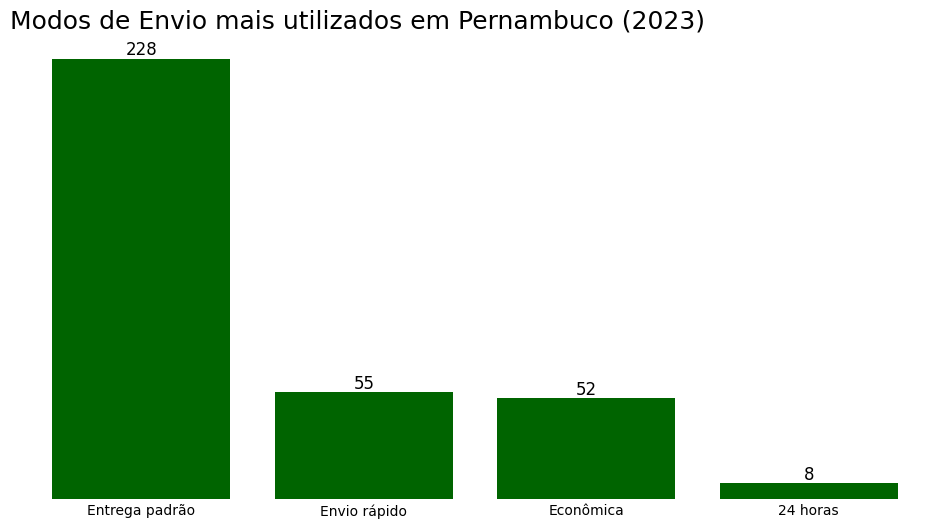

In [14]:
grafico_modo_envio(envios_pe,"envios_pernambuco.png")

### Gerando o documento em pdf do relatório

In [15]:
# !pip install fpdf dataframe_image

In [16]:
from fpdf import FPDF
import dataframe_image as dfi
import time

Os gráficos já estão salvos em imagem em nossa aba de arquivo, falta agora salvar também as tabelas geradas.

In [17]:
dfi.export(vendas_por_mes, 'tab_vendas_por_mes.png', table_conversion="matplotlib")
dfi.export(lucro_dpt, 'tab_lucro_dpt.png', table_conversion="matplotlib")
dfi.export(envios_pe, 'tab_envios_pe.png', table_conversion="matplotlib")

Para facilitar a escrita do pdf, vamos criar duas funções personalizadas: uma para adicionar o título na 1ª página e outra para adicionar textos ao longo do documento

In [18]:
# Função para o título
def titulo(pdf, title):

    # Titulo principal
    pdf.set_font('Helvetica', 'b', 18)
    pdf.ln(10)
    pdf.write(5, title)
    pdf.ln(10)

    # Adicionando a data de geração do relatório
    pdf.set_font('Helvetica', '', 14)
    pdf.set_text_color(r=128, g=128, b=128)
    today = time.strftime("%d/%m/%Y")
    pdf.write(4, f'{today}')

    # Add line break
    pdf.ln(10)

# Função para o texto
def texto(pdf, txt):

    # Ajustando cor de texto, fonte e espaçamento
    pdf.set_text_color(0)
    pdf.set_font('Helvetica', '', 12)

    pdf.write(5, txt)

In [22]:
# Variáveis globais
WIDTH = 210
HEIGHT = 297

# Criando o documento PDF
pdf = FPDF() # A4 (210 x 297 mm)

### Página 1 
pdf.add_page()

# Título
titulo(pdf, "Relatório do Desempenho de Vendas (2023)")

# Título da tabela
texto(pdf, "1. Tabela das Vendas por mês da empresa em 2023")
pdf.ln(10)

# Adicionando a tabela de vendas
pdf.image("tab_vendas_por_mes.png", WIDTH/2 - 20, w=40)
pdf.ln(20)

# Adicionando o gráfico de vendas
pdf.image("vendas_por_mes.png", 10, 150, WIDTH - 20)
pdf.ln(90)

# Texto explicativo
texto(pdf, "A visualização acima mostra a tendência das vendas da empresa durante o ano de 2023. Conseguimos notar " \
           "que em 5 meses no ano as vendas foram acima de 600 mil reais. Julho foi o mês com menor desempenho.")


### Página 2 ###
pdf.add_page()

# Título da tabela 2
pdf.ln(20)
texto(pdf, "2. Tabela dos Lucros por Departamento em 2023")
pdf.ln(10)

# Adicionando a tabela de lucro
pdf.image("tab_lucro_dpt.png", WIDTH/2 - 40, w=80)
pdf.ln(20)

# Adicionando o gráfico de lucro
pdf.image("lucro_departamento.png", 10, WIDTH/2, WIDTH - 20)
pdf.ln(120)

# Texto explicativo
texto(pdf, "O departamento que apresenta o maior lucro da empresa é o Automotivo. O resultado é esperado, visto que grande" \
           "parte dos produtos automotivos estão entre os mais caros por unidade. Na sequência temos os produtos de Jardinagem e" \
           "paisagismo, por fim, os materiais de construção com menos de R$ 30 mil de lucro em 2023.")

### Página 3 ###
pdf.add_page()

# Título da tabela 3
pdf.ln(20)
texto(pdf, "3. Tabela da quantidade de produtos por Modo de Envio em Pernambuco (2023)")
pdf.ln(10)

# Adicionando a tabela de modo de envio
pdf.image("tab_envios_pe.png", WIDTH/2 - 40, w=60)
pdf.ln(20)

# Adicionando o gráfico de modo de envio
pdf.image("envios_pernambuco.png", 10, WIDTH/2, WIDTH - 20)
pdf.ln(120)

# Texto explicativo
texto(pdf, "O modo de envio mais utilizado de forma disparada é a Entrega Padrão, corrrespondendo a quase 67% de todas as entregas em" \
           "Pernambuco. Em seguida, temos a Envio rápido e Econômica e, por último, a de 24 horas com menos de 5% de entregas no estado.")

# Gerando o PDF
pdf.output("Relatório 2023.pdf", 'F')

''